## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 2.2: Atmospheric absorption across the electromagnetic spectrum

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon
%matplotlib inline

In [2]:
def gradient_fill(x, y, fill_color=None, ax=None, **kwargs):
    """
    Plot a line with a linear alpha gradient filled beneath it.
    https://stackoverflow.com/questions/29321835/is-it-possible-to-get-color-gradients-under-curve-in-matplotlib

    Parameters
    ----------
    x, y : array-like
        The data values of the line.
    fill_color : a matplotlib color specifier (string, tuple) or None
        The color for the fill. If None, the color of the line will be used.
    ax : a matplotlib Axes instance
        The axes to plot on. If None, the current pyplot axes will be used.
    Additional arguments are passed on to matplotlib's ``plot`` function.

    Returns
    -------
    line : a Line2D instance
        The line plotted.
    im : an AxesImage instance
        The transparent gradient clipped to just the area beneath the curve.
    """
    if ax is None:
        ax = plt.gca()

    line, = ax.plot(x, y, **kwargs)
    if fill_color is None:
        fill_color = line.get_color()

    zorder = line.get_zorder()
    alpha = line.get_alpha()
    alpha = 1.0 if alpha is None else alpha

    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(0, alpha, 100)[:,None]

    xmin, xmax, ymin, ymax = x.min(), x.max(), y.min(), y.max()
    #im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax], origin='lower', zorder=zorder)
    # change here to put dark ahade at the bottom
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax], origin='upper', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.vstack([[xmin, ymin], xy, [xmax, ymin], [xmin, ymin]])
    clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True)
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)

    ax.autoscale(True)
    return line, im

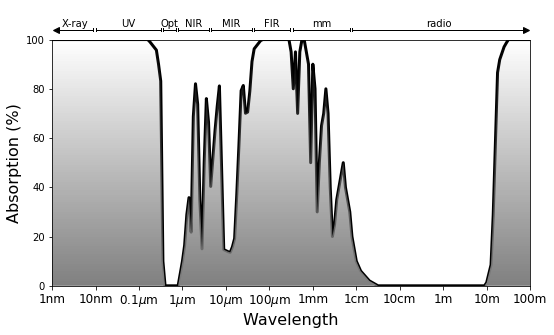

In [3]:
# set up plot
fig = plt.figure(figsize=(8,4.5))
ax1 = fig.add_axes([0.12,0.14,0.83,0.76])
ax1.set_xlabel("Wavelength", fontsize=16)
ax1.set_ylabel("Absorption (%)", fontsize=16)

# set up the axes and labels
x1 = -9
x2 = 2
ax1.set_xlim(x1,x2)
ax1.set_ylim(0,100)
x_labels = ['1nm','10nm','0.1$\mu$m','1$\mu$m','10$\mu$m','100$\mu$m','1mm','1cm','10cm','1m','10m','100m']
x_loc = np.array([-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2])
ax1.set_xticks(x_loc)
ax1.set_xticklabels(x_labels, fontsize=12)

# read in the file of transmission vs wavelength and plot with graduated shading
logwl, trans = np.genfromtxt('atmos_extinction.txt', comments='#', delimiter=',', unpack=True)
gradient_fill(logwl, trans, fill_color='gray', color='black', lw=3)

# annotate the spectral ranges
ax2 = fig.add_axes([0.12,0.9,0.83,0.1])
ax2.set_xlim(x1,x2)
ax2.set_ylim(0,1)
ax2.axis('off')
y0 = 0.3
y1 = 0.25
y2 = 0.35
y3 = 0.4
xlo,xhi = -8.9,-8.05 
ax2.plot([xlo,xhi], [y0,y0], 'k-', lw=1.0)
ax2.plot(xlo, y0, 'k<', lw=1.0)
ax2.plot([xhi,xhi], [y1,y2], 'k-', lw=1.0)
ax2.text((xlo+xhi)/2, y3, 'X-ray', fontsize=10, ha='center')
xlo,xhi = -8,-6.5 
ax2.plot([xlo,xhi], [y0,y0], 'k-', lw=1.0)
ax2.plot([xlo,xlo], [y1,y2], 'k-', lw=1.0)
ax2.plot([xhi,xhi], [y1,y2], 'k-', lw=1.0)
ax2.text((xlo+xhi)/2, y3, 'UV', fontsize=10, ha='center')
xlo,xhi = np.log10(3.5e-7), np.log10(7.0e-7)
ax2.plot([xlo,xhi], [y0,y0], 'k-', lw=1.0)
ax2.plot([xlo,xlo], [y1,y2], 'k-', lw=1.0)
ax2.plot([xhi,xhi], [y1,y2], 'k-', lw=1.0)
ax2.text((xlo+xhi)/2, y3, 'Opt', fontsize=10, ha='center')
xlo,xhi = np.log10(8e-7), np.log10(4e-6)
ax2.plot([xlo,xhi], [y0,y0], 'k-', lw=1.0)
ax2.plot([xlo,xlo], [y1,y2], 'k-', lw=1.0)
ax2.plot([xhi,xhi], [y1,y2], 'k-', lw=1.0)
ax2.text((xlo+xhi)/2, y3, 'NIR', fontsize=10, ha='center')
xlo,xhi = np.log10(4.5e-6), np.log10(40e-6)
ax2.plot([xlo,xhi], [y0,y0], 'k-', lw=1.0)
ax2.plot([xlo,xlo], [y1,y2], 'k-', lw=1.0)
ax2.plot([xhi,xhi], [y1,y2], 'k-', lw=1.0)
ax2.text((xlo+xhi)/2, y3, 'MIR', fontsize=10, ha='center')
xlo,xhi = np.log10(45e-6), np.log10(300e-6)
ax2.plot([xlo,xhi], [y0,y0], 'k-', lw=1.0)
ax2.plot([xlo,xlo], [y1,y2], 'k-', lw=1.0)
ax2.plot([xhi,xhi], [y1,y2], 'k-', lw=1.0)
ax2.text((xlo+xhi)/2, y3, 'FIR', fontsize=10, ha='center')
xlo,xhi = np.log10(3.5e-4), np.log10(7e-3)
ax2.plot([xlo,xhi], [y0,y0], 'k-', lw=1.0)
ax2.plot([xlo,xlo], [y1,y2], 'k-', lw=1.0)
ax2.plot([xhi,xhi], [y1,y2], 'k-', lw=1.0)
ax2.text((xlo+xhi)/2, y3, 'mm', fontsize=10, ha='center')
xlo,xhi = np.log10(8e-3), np.log10(80)
ax2.plot([xlo,xhi], [y0,y0], 'k-', lw=1.0)
ax2.plot([xlo,xlo], [y1,y2], 'k-', lw=1.0)
ax2.plot(xhi, y0, 'k>', lw=1.0)
ax2.text((xlo+xhi)/2, y3, 'radio', fontsize=10, ha='center')

plt.savefig('atmos_absorption.pdf')